# Explanation of data gathering pipeline

In [36]:
import os
import pandas
import wikipedia
from unicodedata import category as cat
langsdict = wikipedia.languages()
langsdict

{'aa': 'Qafár af',
 'ab': 'Аҧсшәа',
 'abs': 'bahasa ambon',
 'ace': 'Acèh',
 'ady': 'адыгабзэ',
 'ady-cyrl': 'адыгабзэ',
 'aeb': 'تونسي/Tûnsî',
 'aeb-arab': 'تونسي',
 'aeb-latn': 'Tûnsî',
 'af': 'Afrikaans',
 'ak': 'Akan',
 'aln': 'Gegë',
 'als': 'Alemannisch',
 'alt': 'алтай тил',
 'am': 'አማርኛ',
 'ami': 'Pangcah',
 'an': 'aragonés',
 'ang': 'Ænglisc',
 'anp': 'अङ्गिका',
 'ar': 'العربية',
 'arc': 'ܐܪܡܝܐ',
 'arn': 'mapudungun',
 'arq': 'جازايرية',
 'ary': 'الدارجة',
 'arz': 'مصرى',
 'as': 'অসমীয়া',
 'ase': 'American sign language',
 'ast': 'asturianu',
 'atj': 'Atikamekw',
 'av': 'авар',
 'avk': 'Kotava',
 'awa': 'अवधी',
 'ay': 'Aymar aru',
 'az': 'azərbaycanca',
 'azb': 'تۆرکجه',
 'ba': 'башҡортса',
 'ban': 'Basa Bali',
 'ban-bali': 'ᬩᬲᬩᬮᬶ',
 'bar': 'Boarisch',
 'bat-smg': 'žemaitėška',
 'bbc': 'Batak Toba',
 'bbc-latn': 'Batak Toba',
 'bcc': 'جهلسری بلوچی',
 'bcl': 'Bikol Central',
 'be': 'беларуская',
 'be-tarask': 'беларуская (тарашкевіца)\u200e',
 'be-x-old': 'беларуская (тарашкев

# 1: Download raw wikipedia XML files
The script downloads these automatically, they come in a compressed .xml.bz format.

In [2]:
dumpspath = './datagather/dumps/'
dumpsraw = dict()
for f in os.listdir(dumpspath):
    if f.startswith('.'): continue
    lang = f[:f.index('.')-4]
    dumpsraw[lang] = [langsdict[lang], os.path.getsize(dumpspath + f)]

In [3]:
dumps = pandas.DataFrame.from_dict(dumpsraw, columns=['name', 'fsize'], orient='index')
dumps.head()

,name,fsize
ht,Kreyòl ayisyen,13973117
li,Limburgs,14315808
ig,Igbo,2109360
tet,tetun,1222946
wuu,吴语,14397542


In [4]:
excluded = [langsdict[l] for l in langsdict.keys() if l not in dumps.index]
print(len(excluded), 'languages excluded:\n', ', '.join(excluded))

206 languages excluded:
 Qafár af, bahasa ambon, адыгабзэ, адыгабзэ, تونسي/Tûnsî, تونسي, Tûnsî, Akan, Gegë, алтай тил, Pangcah, अङ्गिका, ܐܪܡܝܐ, mapudungun, جازايرية, American sign language, Atikamekw, ᬩᬲᬩᬮᬶ, žemaitėška, Batak Toba, Batak Toba, جهلسری بلوچی, беларуская (тарашкевіца)‎, беларуская (тарашкевіца)‎, روچ کپتین بلوچی, भोजपुरी, Bislama, bamanankan, بختیاری, Bráhuí, Batak Mandailing, Iriga Bicolano, Chavacano de Zamboanga, Chamoru, Choctaw, ᏣᎳᎩ, Tsetsêhestâhese, Capiceño, Nēhiyawēwin / ᓀᐦᐃᔭᐍᐏᐣ, къырымтатарджа (Кирилл)‎, qırımtatarca (Latin)‎, словѣньскъ / ⰔⰎⰑⰂⰡⰐⰠⰔⰍⰟ, Österreichisches Deutsch, Schweizer Hochdeutsch, Deutsch (Sie-Form)‎, Thuɔŋjäŋ, Dusun Bundu-liwan, ཇོང་ཁ, eʋegbe, Emiliàn, Canadian English, British English, español de América Latina, español (formal)‎, Fulfulde, meänkieli, võro, Na Vosa Vakaviti, français cadien, 赣语（简体）‎, 贛語（繁體）‎, kriyòl gwiyannen, गोंयची कोंकणी, Gõychi Konknni, 𐌲𐌿𐍄𐌹𐍃𐌺, Ἀρχαία ἑλληνικὴ, Alemannisch, Hawaiʻi, Fiji Hindi, Ilonggo, Hiri Motu, Hunsrik

In [5]:
print(dumps.shape[0], 'languages included:\n', ', '.join(dumps['name']))

248 languages included:
 Kreyòl ayisyen, Limburgs, Igbo, tetun, 吴语, коми, الدارجة, latviešu, la .lojban., भोजपुरी, мокшень, Zeêuws, oʻzbekcha/ўзбекча, تۆرکجه, සිංහල, norsk nynorsk, português, Bahasa Melayu, अवधी, 中文, тыва дыл, svenska, башҡортса, മലയാളം, Tagalog, arpetan, slovenščina, Afrikaans, Jawa, Yorùbá, Mirandés, ગુજરાતી, Frysk, Māori, Xitsonga, sicilianu, italiano, Aymar aru, Gagauz, ꯃꯤꯇꯩ ꯂꯣꯟ, davvisámegiella, føroyskt, తెలుగు, brezhoneg, català, Адыгэбзэ, dansk, 贛語, Pälzisch, Nāhuatl, Novial, qırımtatarca, Simple English, dolnoserbski, ߒߞߏ, Oromoo, অসমীয়া, English, lumbaart, বাংলা, پنجابی, hrvatski, Nouormand, ລາວ, ଓଡ଼ିଆ, русский, 한국어, interlingua, Papiamentu, къарачай-малкъар, Кыргызча, Kotava, български, azərbaycanca, vepsän kel’, Alemannisch, Gaelg, Plattdüütsch, livvinkarjala, Soomaaliga, Piemontèis, Sunda, Ænglisc, galego, Hausa, Mìng-dĕ̤ng-ngṳ̄, کوردی, ייִדיש, emiliàn e rumagnòl, ਪੰਜਾਬੀ, авар, walon, română, Picard, kurdî, گیلکی, مصرى, suomi, မြန်မာဘာသာ, kaszëbsczi, Baha

In [6]:
dumps.sort_values('fsize', ascending=False).head(10) # largest wikis included

,name,fsize
en,English,18267134864
de,Deutsch,5877797639
fr,français,4972442407
ru,русский,4224935955
ja,日本語,3309015603
es,español,3144443923
it,italiano,3129866871
zh,中文,2122775813
pl,polski,2024669975
pt,português,1831289660


In [7]:
dumps.sort_values('fsize').head(10) # smallest wikis included

,name,fsize
nqo,ߒߞߏ,1049963
jbo,la .lojban.,1074932
pdc,Deitsch,1085523
nov,Novial,1111229
mdf,мокшень,1119182
smn,anarâškielâ,1149766
lbe,лакку,1188547
tet,tetun,1222946
kbp,Kabɩyɛ,1316060
tpi,Tok Pisin,1371967


<AxesSubplot:ylabel='Frequency'>

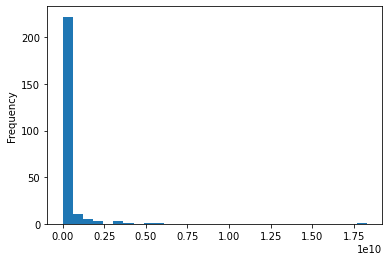

In [23]:
dumps['fsize'].plot.hist(bins=30) # many small wikis, just a few big wikis

Here is an example of Qaraqalpaqsha's raw dump file:

In [9]:
f = open('./datagather/kaa-raw.xml', 'r')
exdump = f.readlines()
f.close()
exdump[:20]

['<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.10/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.10/ http://www.mediawiki.org/xml/export-0.10.xsd" version="0.10" xml:lang="kaa">\n',
 '  <siteinfo>\n',
 '    <sitename>Wikipedia</sitename>\n',
 '    <dbname>kaawiki</dbname>\n',
 '    <base>https://kaa.wikipedia.org/wiki/Bas_bet</base>\n',
 '    <generator>MediaWiki 1.36.0-wmf.31</generator>\n',
 '    <case>first-letter</case>\n',
 '    <namespaces>\n',
 '      <namespace key="-2" case="first-letter">Media</namespace>\n',
 '      <namespace key="-1" case="first-letter">Arnawlı</namespace>\n',
 '      <namespace key="0" case="first-letter" />\n',
 '      <namespace key="1" case="first-letter">Sa\'wbet</namespace>\n',
 '      <namespace key="2" case="first-letter">Paydalanıwshı</namespace>\n',
 '      <namespace key="3" case="first-letter">Paydalanıwshı sa\'wbeti</namespace>\n',
 '      <namespace key="4" case="fi

In [10]:
exdump[3745:3765]

['      <sha1>j4b51cvuaoqrzh27274l7fzp3q29453</sha1>\n',
 '    </revision>\n',
 '  </page>\n',
 '  <page>\n',
 "    <title>A'jiniyaz</title>\n",
 '    <ns>0</ns>\n',
 '    <id>152</id>\n',
 '    <revision>\n',
 '      <id>43321</id>\n',
 '      <parentid>30626</parentid>\n',
 '      <timestamp>2020-05-01T08:16:04Z</timestamp>\n',
 '      <contributor>\n',
 '        <ip>185.163.26.25</ip>\n',
 '      </contributor>\n',
 '      <model>wikitext</model>\n',
 '      <format>text/x-wiki</format>\n',
 '      <text bytes="7440" xml:space="preserve">\'\'\'A\'jiniyaz Qosıbay ulı\'\'\' (a\'debiy laqabı \'\'Ziywar\'\') - XIX a\'sirdegi qaraqalpaq klassik a\'debiyatının\' en\' o\'rnekli wa\'killerinin\' biri. Ol do\'retiwshiliginde o\'zine ta\'n o\'zgeshelikke iye, og\'ada talantlı, oqımıslı, medreseni ayrıqsha tamamlag\'an aqun, ulama, ko\'rkem so\'z sheberi sıpatında basqalardan ayrılıp turatug\'ın uqıplılıq penen o\'z da\'wirinin\' progressiv idealların ju\'zege shıg\'ardı, anıq turmıs haqıyqatl

I considered dumps that were less than 1MB to be too small and I excluded them, because they do not hold enough text. This becomes very clear once the XML is removed. I'll show an example of this in the next section.

# 2: Remove the XML and wikipedia formatting

One of the languages that ultimately gets excluded is Qafár af. Here I'll read in its expanded dump file:

In [11]:
f = open('datagather/aa-raw.xml')
aaraw = f.readlines()
f.close()

In [12]:
len(aaraw)

5526

In [13]:
aaraw[:20]

['<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.10/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.10/ http://www.mediawiki.org/xml/export-0.10.xsd" version="0.10" xml:lang="aa">\n',
 '  <siteinfo>\n',
 '    <sitename>Wikipedia</sitename>\n',
 '    <dbname>aawiki</dbname>\n',
 '    <base>https://aa.wikipedia.org/wiki/Main_Page</base>\n',
 '    <generator>MediaWiki 1.36.0-wmf.32</generator>\n',
 '    <case>first-letter</case>\n',
 '    <namespaces>\n',
 '      <namespace key="-2" case="first-letter">Media</namespace>\n',
 '      <namespace key="-1" case="first-letter">Special</namespace>\n',
 '      <namespace key="0" case="first-letter" />\n',
 '      <namespace key="1" case="first-letter">Talk</namespace>\n',
 '      <namespace key="2" case="first-letter">User</namespace>\n',
 '      <namespace key="3" case="first-letter">User talk</namespace>\n',
 '      <namespace key="4" case="first-letter">Wikipedia</names

At first glance, this language's XML file has 5526 lines, which sounds like enough to at least get a good sampling of what the language looks like. But then I stripped all the XML and extra Wikipedia information off.

In [14]:
f = open('datagather/aa.txt')
aa = f.readlines()
f.close()

In [15]:
aa

['{"id": "1426", "revid": "2266", "url": "https://aa.wikipedia.org/wiki?curid=1426", "title": "Main page", "text": ""}\n',
 '{"id": "2105", "revid": "361", "url": "https://aa.wikipedia.org/wiki?curid=2105", "title": "Wikipedia", "text": "Wikipedia bödero kœáth amliethog e rhyδ gē gell tō un gelœga. Denn grëað zero œáthws ar ðechre di zera gentannwm hon."}\n']

As you can see, the output of the tool I used is one json object per page/article. From 5526 lines, Qafár af is left with just two pages, one of which has no text at all. The other page is just a sentence long; it seems to be a message notifying users that this wikipedia is closed and not maintained. This is why I excluded languages whose raw dump files are smaller than 1MB.

Returning to Qaraqalpaqsha, which I showed the raw dump for earlier, here is its Wikipedia with the XML and Wikipedia formatting removed:

In [16]:
f = open('datagather/kaa-extracted.txt', 'r')
kaa = f.readlines()
f.close()
# kaa = [ w.encode('utf-8').decode('raw_unicode_escape') for w in kaa]

In [17]:
kaa[:20]

['{"id": "16", "revid": "19", "url": "https://kaa.wikipedia.org/wiki?curid=16", "title": "Main Page", "text": ""}\n',
 '{"id": "140", "revid": "6", "url": "https://kaa.wikipedia.org/wiki?curid=140", "title": "Bas bet/Interwikis", "text": "&lt;includeonly&gt; &lt;/includeonly&gt;"}\n',
 '{"id": "148", "revid": "17", "url": "https://kaa.wikipedia.org/wiki?curid=148", "title": "A\'bdiraman O\'tepov", "text": "A\'bdiraman O\'tepov (1905-1934) - qaraqalpaq dramaturgiyasının\' tiykarın salıwshılardın\' biri. Ol talantlı dramaturg, rejissyor, aktyor, muzıkant, ko\'rnekli teatr iskeri sıpatında qaraqalpaq xalqının\' tariyxında belgili iz qaldırdı. \\nA\'.O\'tepov 1905 jılı Qon\'ıratta mayda sawdager semyasında tuwıldı. 1906 jılı a\'kesi semyası menen Aral ten\'izinin\' qubla-shıg\'ıs jag\'asına jaqın Qosjap degen jerge ko\'ship keledi ha\'m balıq o\'ndirisi ka\'sibi menen shug\'ıllana baslaydı. Bul O\'tepovtın\' semyasının\' ruslar menen jaqınlasıwına mu\'mkinshilik tuwdırdı.\\n1910 jılı ol Ni

The encoding is causing some weird display issues for some characters here, it's strange because it shows up fine in my text editor and in zsh with the `head` command. Either way, it gets corrected once it travels through the rest of my current data correction pipeline and the file which I'll show later displays fine.

# 3: Get the article text
The next step in the pipeline is correcting the encoding for languages that do not use latin script, which look like a series of unicode codepoints (eg `\u1324\u3124...`) after the XML and Wikipedia formatting is extracted. Then, I grab just article text from the json objects.

In [33]:
f = open('datagather/af-texts.txt')
aftexts = f.readlines()
f.close()

In [34]:
len(aftexts)

1

In [35]:
aftexts = aftexts[0]
print(aftexts[:400])

 AfrikaAfrika is die wêreld se tweede grootste kontinent (na Asië) in sowel oppervlakte as bevolking. Saam met die eilande beslaan dit ongeveer 30 221 532 km² wat 20,3% van die totale landoppervlakte van die aarde is en dit word bewoon deur meer as 1 miljard mense – ongeveer 'n sewende van die wêreldbevolking.Tale.Die meeste amptelike tale van Afrika is Indo-Europese tale soos Frans, Engels, Portu


As you can see, it's not perfectly clean - I still have a bug somewhere where some words are not being separated by spaces. This should start with "Afrika Afrika", not "AfrikaAfrika". Sometimes I'll also see other random things like links or remaining XML that managed to slip through too. 

After this step, I was planning to tokenize. I added this in and started to run the script on all the data, but disliked the results I was getting. I don't know what tool I could use to tokenize different languages since there are so many different rules, types of puntuation, and probably a lot of things I don't know about how to tokenize the languages I don't speak. So, I just took the tokenizing step out at least for now.
# 4: Cleaning to remove punctuation, extra spaces
Next, I just pass the text through a filter to remove all puntuation characters and replace sequences of multiple spaces in a row with just one space.

In [63]:
f = open('datagather/af2.txt', encoding='utf-8')
afclean = f.readlines()
f.close()

In [64]:
afclean[0][:400]

' AfrikaAfrika is die wêreld se tweede grootste kontinent na Asië in sowel oppervlakte as bevolking Saam met die eilande beslaan dit ongeveer 30\xa0221\xa0532\xa0km² wat 203 van die totale landoppervlakte van die aarde is en dit word bewoon deur meer as 1 miljard mense ongeveer n sewende van die wêreldbevolkingTaleDie meeste amptelike tale van Afrika is IndoEuropese tale soos Frans Engels Portugees Spaans e'

Again, there is some strange encoding issue when I display it in Jupyter that is not occurring elsewhere. You can see it in the spaces between the numbers. 

# 5: Chunking and shuffling
Originally I had the idea to make each line a sentence or a certain number of words. Then I realized not all languages separate words or sentences the same way, and decided the most language-neutral way to do this would be to simply make each line 500 characters long. I refer to each line as a chunk, and simply divide the long block of text every 500 characters. I'm sure there are better ways to handle this, but I chose this simple way for now at least. Then, if there are more than 100000 chunks, I randomly sample 100000 chunks to prevent any larger languages from being overrepresented in my data. This number is somewhat arbitrary so I might revisit later. Lastly, I shuffle the chunks.

In [67]:
f = open('datagather/extracted/af.txt', encoding='utf-8')
af = f.readlines()
f.close()

In [68]:
af[:3]

['07 en 191112 Ivan Haarburger 191214 en Sol Harris 1929Die gemeenskap het n goed ontwikkelde netwerk instellings gehad waaronder n doelmatige gemeenskapsentrum vir kultuur en opvoedingsaktiwiteite In 1965 is n groot nuwe sinagoge gebou In 1956 het die Hebreeuse gemeente Chevra Kaddisha talmoed tora en liefdadigheidsintellings saamgespan om die Verenigde Hebreeuse Instellings van Bloemfontein te vormDaar was ook onder meer n OVS provinsiale komitee van de SuidAfrikaanse Joodse Raad van Afgevaardig\n',
 ' nie en het die lyding beëindig wat ander wesens nog ervaarSiddhartha Gautama word nie as die enigste Boeddha beskou nie Die Palikanon verwys na talle vorige Boeddhas sien Lys van bekende Boeddhas terwyl die Mahayanatradisie nog baie Boeddhas van hemelse eerder as historiese oorsprong noem n Algemene geloof is dat die volgende Boeddha se naam Maitreya sal weesTheravadaBoeddhismeIn die Theravadatradisie kan n persoon ontwaak word uit die slaap van onkunde deur die ware aard van realiteit

In [69]:
f = open('datagather/extracted/en.txt', encoding='utf-8')
en = f.readlines()
f.close()

In [72]:
en[:5]

['e countries and the preventable deaths of several childrenMechanismAutisms symptoms result from maturationrelated changes in various systems of the brain How autism occurs is not well understood Its mechanism can be divided into two areas the pathophysiology of brain structures and processes associated with autism and the neuropsychological linkages between brain structures and behaviors The behaviors appear to have multiple pathophysiologiesThere is evidence that gutbrain axis abnormalities may\n',
 'and reflects less heat back into space This feedback loop results in a reduced albedo effectClimate and weatherAlbedo affects climate by determining how much radiation a planet absorbs The uneven heating of Earth from albedo variations between land ice or ocean surfaces can drive weatherAlbedotemperature feedbackWhen an areas albedo changes due to snowfall a snowtemperature feedback results A layer of snowfall increases local albedo reflecting away sunlight leading to local cooling In p

Despite having shuffled, some chunks look more related than I might have expected by chance, so I'm planning to check on that. On the bright side, the encoding issues from files I showed you mid-pipeline do not seem present in these written out files.

# To do
Fixing things
- Fix lack of space between some word
- Check for shuffling bug
- More data cleaning
- Increase amount of each language processed
- Reconsider arbitrary decisions: chunk size and splitting heuristic, maximum number of chunks, etc 

Next data gathering steps
- Revisit tokenization?
- Create corpus that has all languages mixed and shuffled together, with each chunk labeled for its language
- Feature extraction
- Split into train/dev/test sets, ensuring equal representation of languages

I also do have some ideas for how I will separate a language from its writing system automatically, so the classifier doesn't just pay attention to that. Lets say a sample of text starts:
        
        nfcdsoe fdjswlg afk

The first character, 'n' will be represented by a 0, the 'f' by a 1, c by a 2, and so on until reaching the space character, which will still be represented by a space. The second word starts with 'f', which we already chose to represent by 2. The 'd' will be represented by 3 after being discovered in the first word. The 'j' is new, so it will be represented by '7' because it is the seventh new character to be discovered. Overall, the text will become (with dashes inserted for readability):

        0-1-2-3-4-5-6 1-3-7-4-8-9-10 11-1-12
        
Then, I would store each number on disk as an integer. I don't know if Python will give me that much control over how things are written to disk, Python might store as string which is less efficient. I could do it in C if need be, but would like to stick to Python where possible since it's what we use in this class.